# Kernel tests

with skimage and opencv

## creating random 0 and 1 matrix

### imports

In [6]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt

import skimage.io
import skimage.filters
%matplotlib widget


### Matrix

In [7]:
random_matrix = [0]*9500 + [1]*500

random.shuffle(random_matrix)
np_matrix = np.array(random_matrix)

shaped_matrix = np_matrix.reshape(100,100)

In [8]:
shaped_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

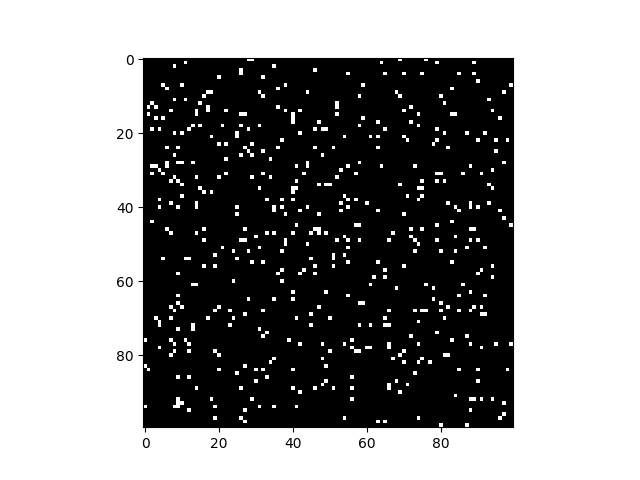

In [4]:
plt.figure()
plt.imshow(shaped_matrix, cmap='gray')

In [5]:
sigma = 2.0

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    shaped_matrix, sigma=(sigma, sigma), truncate=3.5, multichannel=True)


/tmp/ipykernel_15855/999261412.py:4: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  blurred = skimage.filters.gaussian(


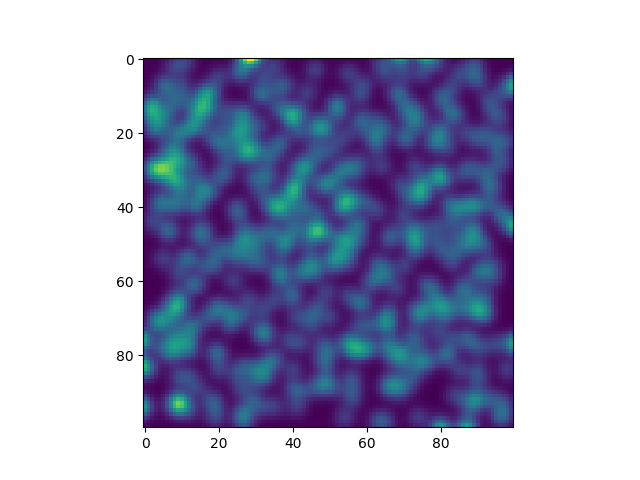

In [6]:
# display blurred image
plt.figure()
plt.imshow(blurred)
# plt.show()

## Padding

In [7]:
padded_image_0 = np.pad(
        shaped_matrix, 10,
        #np.ceil((((np.hypot(*shaped_matrix.shape)) - shaped_matrix.shape)) / 2).astype(int),
        mode='constant',
        constant_values=0)

padded_image_0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

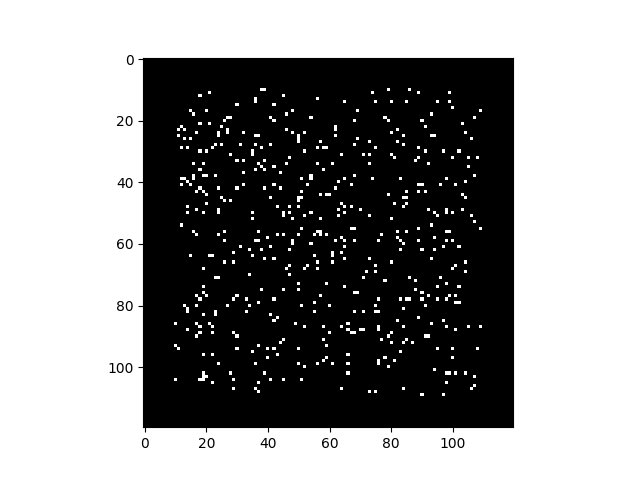

In [8]:
plt.figure()
plt.imshow(padded_image_0, cmap='gray')
# plt.show()

In [10]:
padded_image_nan = np.pad(
        shaped_matrix, 10,
        #np.ceil((((np.hypot(*shaped_matrix.shape)) - shaped_matrix.shape)) / 2).astype(int),
        mode='constant',
        constant_values= -1)

padded_image_nan = padded_image_nan.astype('float')

padded_image_nan[padded_image_nan == -1] = np.nan
padded_image_nan.shape

(120, 120)

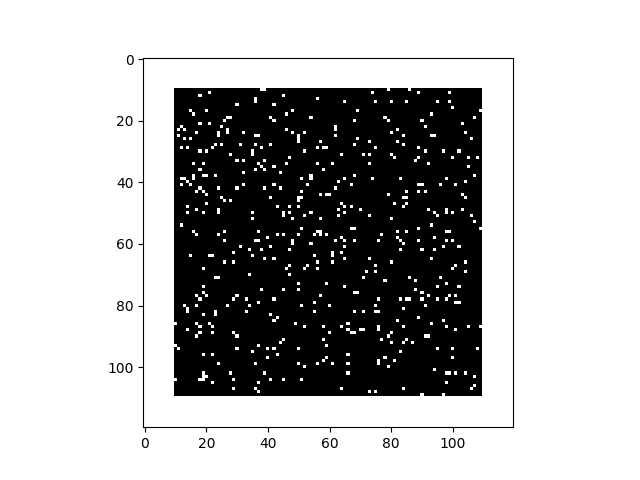

In [12]:
plt.figure()
plt.imshow(padded_image_nan, cmap='gray')
# plt.show()

## blurring with skimage

comparison between skimage and opencv filter

gau_img = cv2.GaussianBlur(img, (5,5), 10.0) # 5*5 kernel, 2 on each side. 2 = 1/5 * 10 = 1/5 * sigma
gau_img = skimage.filters.gaussian(img, sigma=10, truncate=1/5)

/tmp/ipykernel_15855/3190558771.py:5: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  blurred_pad = skimage.filters.gaussian(


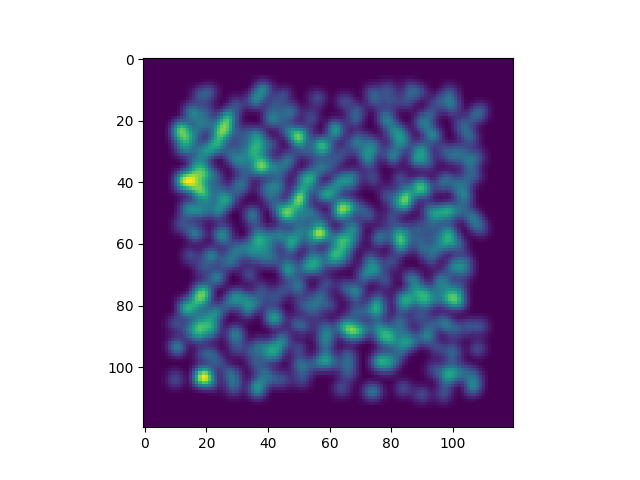

In [13]:
sigma = 2
# apply Gaussian blur, creating a new image
truncate = sigma*1

blurred_pad = skimage.filters.gaussian(
    padded_image_0, sigma=(sigma, sigma), truncate= truncate, multichannel=True)

plt.figure()
plt.imshow(blurred_pad)


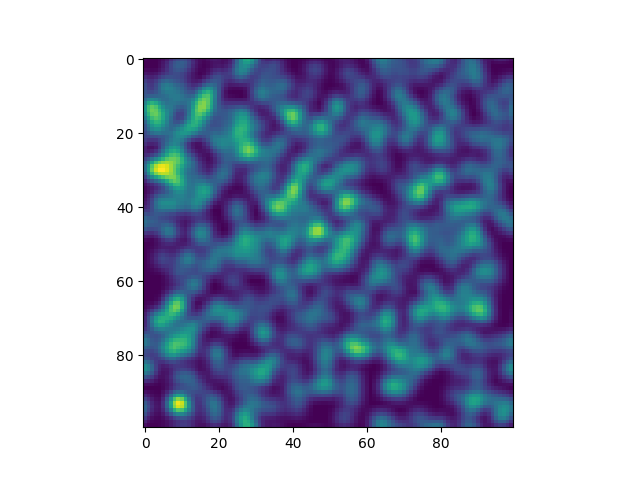

In [14]:
sigma = 2
# apply Gaussian blur, creating a new image
truncate = sigma*1

blurred_pad = skimage.filters.gaussian(
    shaped_matrix, sigma=(sigma, sigma), truncate= truncate, mode='wrap')

plt.figure()
plt.imshow(blurred_pad)


## blurring with open-cv

In [142]:
from cv2 import GaussianBlur
from cv2 import BORDER_TRANSPARENT
from cv2 import BORDER_REFLECT_101

shaped_matrix_f32 = np.float32(shaped_matrix)

kernel_size = 19
sigma = 2

blurred_cv2 = GaussianBlur(shaped_matrix_f32, #input array
                           #dst, outpu array
                           (kernel_size,kernel_size),
                           sigmaX = sigma, #sigmaX
                           sigmaY = sigma,
                           # 0, sigmay default,
#                            borderType = BORDER_REFLECT_101  #type of border
                          )


In [143]:
blurred_cv2

array([[4.82729120e-05, 1.34246628e-04, 5.99579187e-04, ...,
        1.38307150e-04, 1.61011631e-04, 1.78014016e-04],
       [7.42089251e-05, 1.77783499e-04, 6.97146461e-04, ...,
        3.21722939e-04, 4.21732489e-04, 4.71700623e-04],
       [1.93891159e-04, 3.77335760e-04, 1.13623496e-03, ...,
        1.19650271e-03, 1.65404950e-03, 1.85584498e-03],
       ...,
       [1.30149294e-02, 1.15124555e-02, 8.07804614e-03, ...,
        9.04226154e-02, 8.47871080e-02, 8.07503313e-02],
       [5.83141157e-03, 5.15795499e-03, 3.61726712e-03, ...,
        8.02487209e-02, 7.35483989e-02, 6.92605600e-02],
       [3.49911209e-03, 3.09491507e-03, 2.16977554e-03, ...,
        7.51100630e-02, 6.80870190e-02, 6.37669340e-02]], dtype=float32)

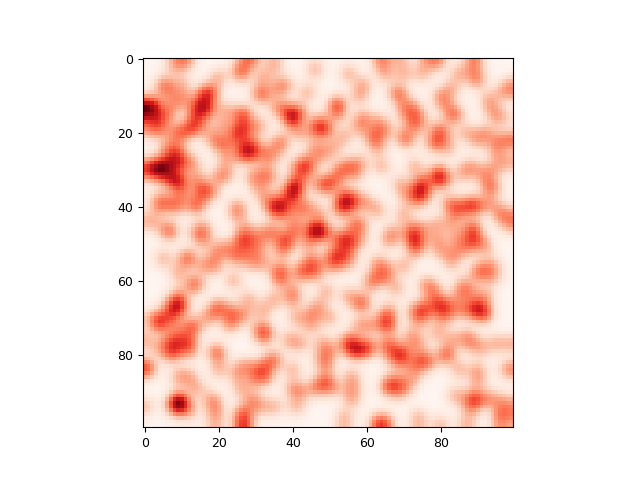

In [149]:
plt.figure()
plt.imshow(blurred_cv2, cmap='Reds')

## Standarizing with minmaxscaler 

In [16]:
from sklearn.preprocessing import normalize

#not working with Nans

# scaled = normalize(blurred_pad.reshape(120*120,1), norm='max', axis=0).reshape(120,120)
# scaled

In [17]:
x, y = blurred_pad.shape
y

100

In [18]:
from sklearn.preprocessing import MinMaxScaler

x, y = blurred_pad.shape

scaler = MinMaxScaler(feature_range=(0, 1))
scaled =scaler.fit_transform(blurred_pad.reshape(x*y,1)).reshape(x,y)


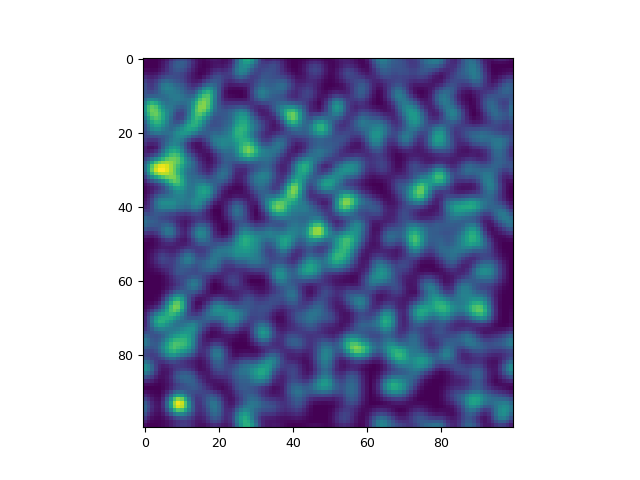

In [148]:
plt.figure()

plt.imshow(scaled)

In [20]:
scaled.max()

1.0

## muplying (scaled channel)

/tmp/ipykernel_15855/1537132015.py:5: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0.Please use `channel_axis` instead.
  blurred_multiplied = skimage.filters.gaussian(


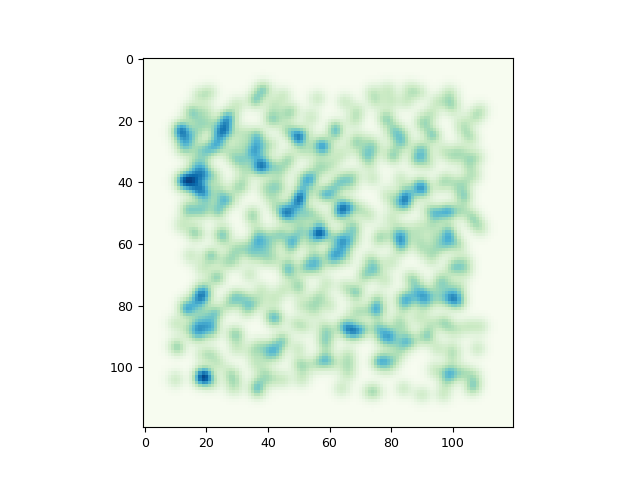

In [147]:
padded_multiplied = padded_image_0 * 255

padded_multiplied.max()

blurred_multiplied = skimage.filters.gaussian(
    padded_multiplied, sigma=(sigma, sigma), truncate=3.5, multichannel=True)

plt.figure()
plt.imshow(blurred_multiplied, cmap='GnBu')


In [ ]:
blurred_multiplied.max()

## Aplying histogram tools from skimage

extracted from 
https://scikit-image.org/docs/stable/auto_examples/index.html

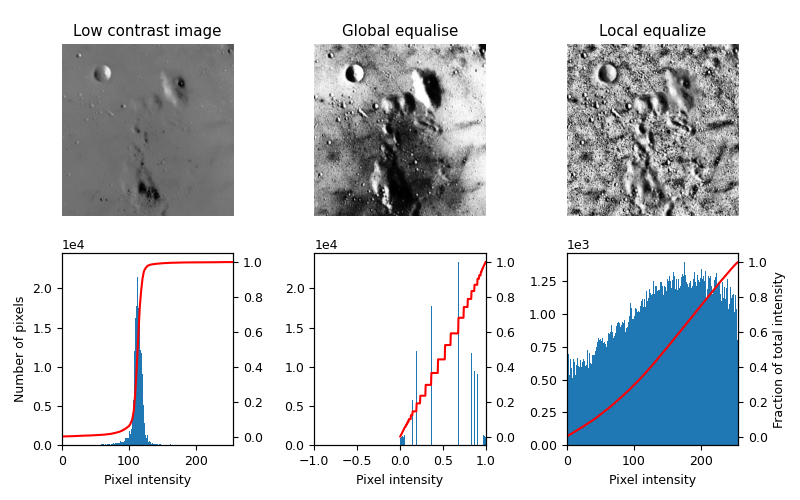

In [25]:
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


plt.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = img_as_ubyte(data.moon())

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

/tmp/ipykernel_15855/4258828608.py:47: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  img_eq = rank.equalize(img, footprint=footprint)


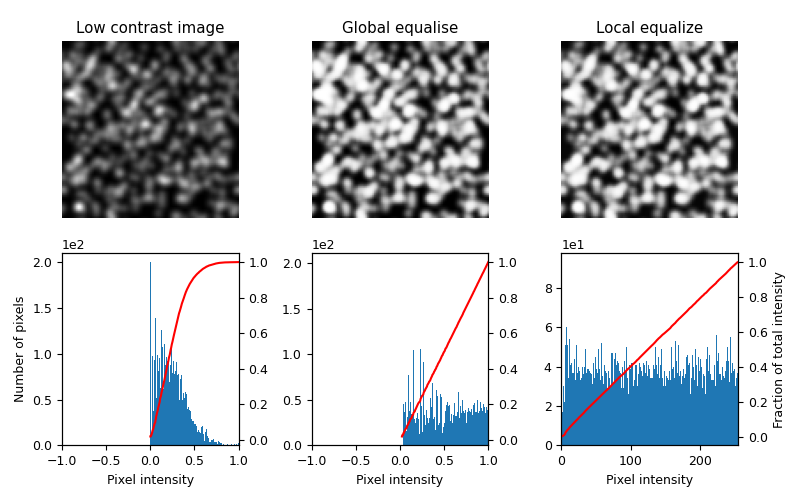

In [27]:
from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank


plt.rcParams['font.size'] = 9


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = scaled

# Global equalize
img_rescale = exposure.equalize_hist(img)

# Equalization
footprint = disk(30)
img_eq = rank.equalize(img, footprint=footprint)


# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()

#  testing with grid

In [32]:
# Break grid in rows. First as if feature is in row

df_grid = pd.read_csv('../livablestreets/data/WorkingTables/Berlin_grid_100m.csv')

lat_start_limits = df_grid['lat_start'].unique()
lng_start_limits = df_grid['lng_end'].unique()

# for lats_index in range(5,7):#range(len(lat_start_limits)):
#     df_grid = df_grid[df_grid['lat']>=lat_start_limits[lats_index]]
#     df_grid = df_grid[df_grid['lat']<lat_end_limits[lats_index]]
    
# print(df_grid)

In [33]:
len(lat_start_limits)

374

In [34]:
len(lng_start_limits)

359

In [35]:
df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134266 entries, 0 to 134265
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   lat_start            134266 non-null  float64
 1   lat_end              134266 non-null  float64
 2   lng_start            134266 non-null  float64
 3   lng_end              134266 non-null  float64
 4   lat_center           134266 non-null  float64
 5   lng_center           134266 non-null  float64
 6   km_to_centroid       134266 non-null  float64
 7   grid_in_berlin       134266 non-null  bool   
 8   degrees_to_centroid  134266 non-null  float64
dtypes: bool(1), float64(8)
memory usage: 8.3 MB


In [36]:
len(lat_start_limits)*len(lng_start_limits)

134266

In [37]:
df_grid

,lat_start,lat_end,lng_start,lng_end,lat_center,lng_center,km_to_centroid,grid_in_berlin,degrees_to_centroid
0,52.673946,52.674846,13.088348,13.090219,52.674396,13.089283,28.580351,False,151.086018
1,52.673946,52.674846,13.090219,13.092089,52.674396,13.091154,28.486979,False,150.940452
2,52.673946,52.674846,13.092089,13.093960,52.674396,13.093024,28.393863,False,150.793543
3,52.673946,52.674846,13.093960,13.095830,52.674396,13.094895,28.301005,False,150.645274
4,52.673946,52.674846,13.095830,13.097701,52.674396,13.096765,28.208406,False,150.495627
...,...,...,...,...,...,...,...,...,...
134261,52.338246,52.339146,13.750511,13.752381,52.338696,13.751446,29.803319,False,335.000641
134262,52.338246,52.339146,13.752381,13.754252,52.338696,13.753317,29.904185,False,335.117700
134263,52.338246,52.339146,13.754252,13.756122,52.338696,13.755187,30.005250,False,335.233737
134264,52.338246,52.339146,13.756122,13.757993,52.338696,13.757058,30.106509,False,335.348764


In [49]:
matrix_1Dgrid = df_grid.to_numpy()
n_columns = len(df_grid.columns)

In [50]:
n_columns

22

In [51]:
matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)

ValueError: cannot reshape array of size 28490 into shape (374,359,22)

In [45]:
matrix_2Dgrid.shape

(374, 359, 9)

## testing with featurecounts csv

In [87]:
df_berlin = pd.read_csv('../livablestreets/data/WorkingTables/FeatCounts_Berlin_grid_3000m.csv')
df_berlin.shape

(132, 22)

In [86]:
df_berlin[500:510]

,lat_start,lat_end,lng_start,lng_end,lat_center,lng_center,km_to_centroid,grid_in_berlin,degrees_to_centroid,polygon,...,activities_health_care,activities_public_service,comfort_leisure_sports,comfort_sports,convenience,mobility_public_transport,social_community,social_culture,social_eating,social_night_life
500,52.536246,52.545246,13.275400,13.294105,52.540746,13.284752,9.073060,True,161.536539,"Path(array([[52.5362462 , 13.27539965],\n ...",...,0,0,0,0,0,0,0,0,0,0
501,52.536246,52.545246,13.294105,13.312810,52.540746,13.303457,7.986796,True,158.343887,"Path(array([[52.5362462 , 13.29410482],\n ...",...,0,0,0,0,0,0,0,0,0,0
502,52.536246,52.545246,13.312810,13.331515,52.540746,13.322163,6.961373,True,153.907984,"Path(array([[52.5362462 , 13.31280998],\n ...",...,0,0,0,0,0,0,0,0,0,0
503,52.536246,52.545246,13.331515,13.350220,52.540746,13.340868,6.027921,True,147.429732,"Path(array([[52.5362462 , 13.33151515],\n ...",...,0,0,0,0,0,0,0,0,0,0
504,52.536246,52.545246,13.350220,13.368925,52.540746,13.359573,5.235863,True,137.437387,"Path(array([[52.5362462 , 13.35022031],\n ...",...,0,0,0,0,0,0,0,0,0,0
505,52.536246,52.545246,13.368925,13.387631,52.540746,13.378278,4.657898,True,121.482825,"Path(array([[52.5362462 , 13.36892548],\n ...",...,0,0,0,0,0,0,0,0,0,0
506,52.536246,52.545246,13.387631,13.406336,52.540746,13.396983,4.379621,True,97.736836,"Path(array([[52.5362462 , 13.38763064],\n ...",...,0,0,0,0,0,0,0,0,0,0
507,52.536246,52.545246,13.406336,13.425041,52.540746,13.415688,4.457517,True,71.187641,"Path(array([[52.5362462 , 13.40633581],\n ...",...,0,0,0,0,0,0,0,0,0,0
508,52.536246,52.545246,13.425041,13.443746,52.540746,13.434394,4.874542,True,50.744409,"Path(array([[52.5362462 , 13.42504097],\n ...",...,0,0,0,0,0,0,0,0,0,0
509,52.536246,52.545246,13.443746,13.462451,52.540746,13.453099,5.554833,True,37.702642,"Path(array([[52.5362462 , 13.44374614],\n ...",...,0,0,0,0,0,0,0,0,0,0


In [88]:
df_berlin.nunique()

lat_start                     12
lat_end                       12
lng_start                     11
lng_end                       11
lat_center                    12
lng_center                    11
km_to_centroid               132
grid_in_berlin                 2
degrees_to_centroid          132
polygon                      132
activities_economic           24
activities_education          29
activities_health_care        39
activities_public_service     38
comfort_leisure_sports        28
comfort_sports                20
convenience                   18
mobility_public_transport     43
social_community              17
social_culture                23
social_eating                 37
social_night_life             27
dtype: int64

## Function grid to matrix, dropping coordinates

In [89]:

def grid_tomatrix(df):
    lat_start_limits = df['lat_start'].unique()
    lng_start_limits = df['lng_end'].unique()
    df_num = df.iloc[:,10:]
    matrix_1Dgrid = df_num.to_numpy()
    n_columns = len(df_num.columns)

    matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)
    return matrix_2Dgrid

In [90]:
grid_berlin = grid_tomatrix(df_berlin)

In [91]:
grid_berlin.shape

(12, 11, 12)

NameError: name 'grid_berlin' is not defined

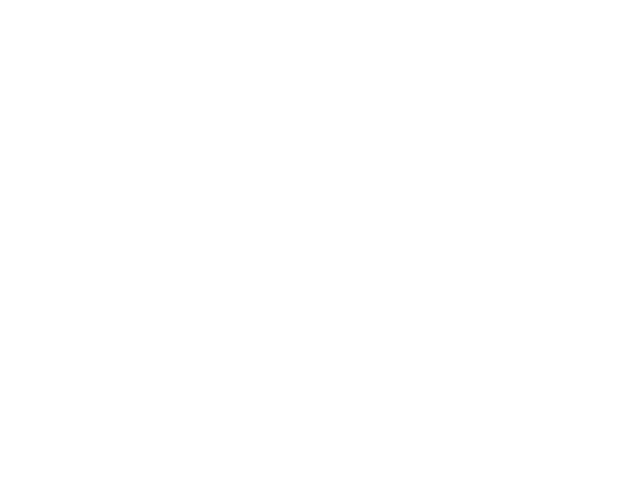

In [68]:
plt.figure()
plt.imshow(grid_berlin[:,:,1])

## Function blurring image

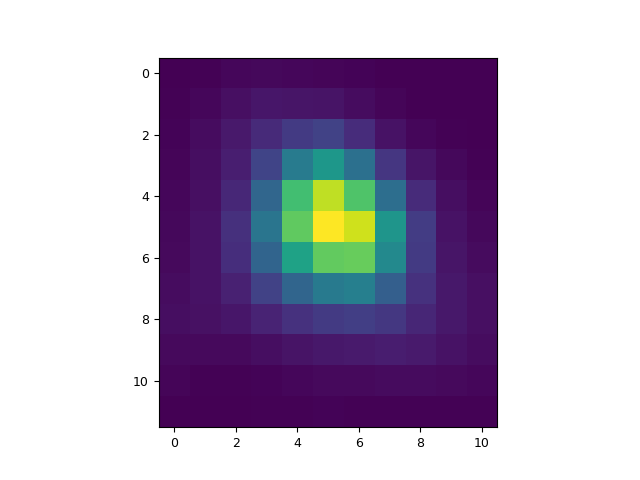

In [168]:
sigma = 1
truncate = sigma*2

blurred_pad = skimage.filters.gaussian(
    grid_berlin[:,:,6], sigma=(sigma, sigma), truncate= truncate, mode='wrap')

plt.figure()
plt.imshow(blurred_pad)

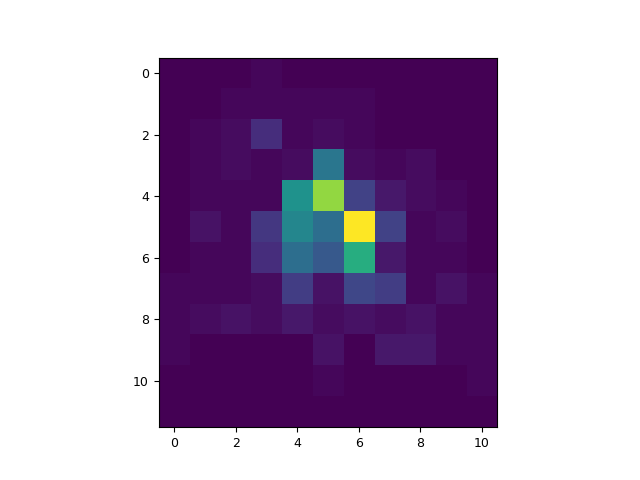

In [344]:
def blur_matrix(array,sigmapx):
    truncate = sigmapx*3
    blurred_img = skimage.filters.gaussian(
        array, sigma=(sigmapx, sigmapx), truncate= truncate, mode='wrap')
    
    return blurred_img.reshape(array.shape[0],array.shape[1],1)

plt.figure()
plt.imshow(blur_matrix(grid_berlin[:,:,6],0))

In [345]:
blur_matrix(grid_berlin[:,:,1],0).shape

(12, 11, 1)

## Function Standarization

In [346]:
from sklearn.preprocessing import MinMaxScaler

def minmax_blur(array,sigmapx):
    
    blured = blur_matrix(array,sigmapx)
    x, y = array.shape
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled =scaler.fit_transform(blured.reshape(x*y,1)).reshape(x,y,1)
    
    return scaled

In [347]:
minmax_blur(grid_berlin[:,:,1],2).max()

1.0

In [348]:
minmax_blur(grid_berlin[:,:,1],2).shape

(12, 11, 1)

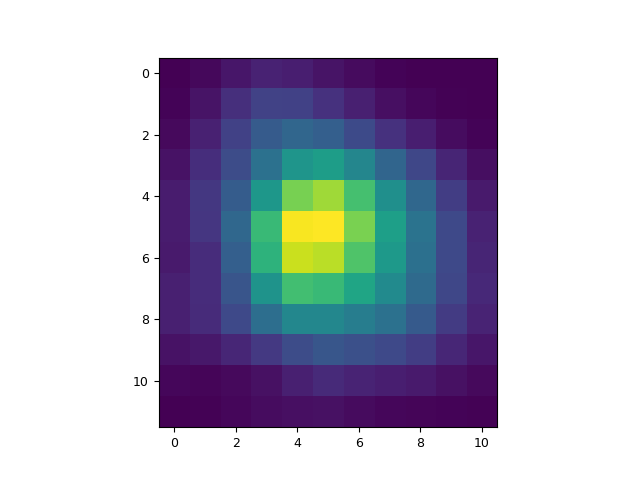

In [367]:
plt.figure()
plt.imshow(minmax_blur(grid_berlin[:,:,3],1))

## Function for loop channels

In [350]:
ls = [*range(grid_berlin.shape[2])]
ls

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [351]:
grid_berlin.shape

(12, 11, 12)

In [352]:
ls = list(range(2,5))
ls

[2, 3, 4]

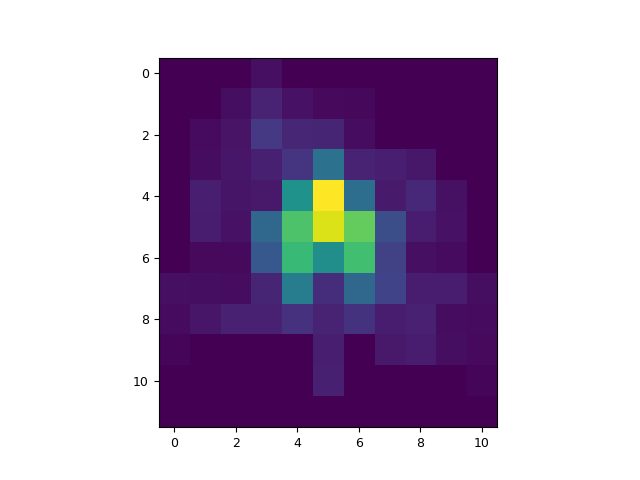

In [377]:
def loop_channels(array,slice_start,slice_stop,sigmapx):
#     array_sc = minmax_blur(array,sigmapx)
    blurred_img = np.zeros((array.shape[0],array.shape[1],1))
                              
    for i in list( range( slice_start, slice_stop )):
        blur_channel = minmax_blur(array[:,:,i],sigmapx)
        blurred_img += blur_channel
    return blurred_img

plt.figure()
plt.imshow(loop_channels(grid_berlin,0,12,0))

In [368]:
img = loop_channels(grid_berlin,1,12,1)

In [369]:
from sklearn.preprocessing import MinMaxScaler

def minmax_all(array):

    x, y, z = array.shape
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled =scaler.fit_transform(array.reshape(x*y,z)).reshape(x,y,z)
    
    return scaled

In [371]:
minmax_all(img).max()

1.0

# Final

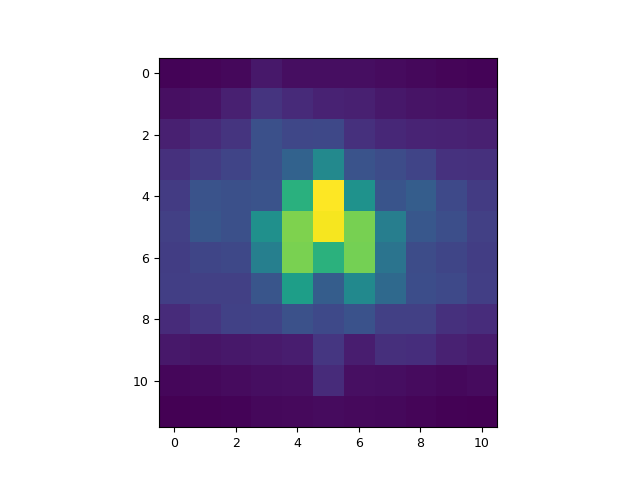

In [385]:
from sklearn.preprocessing import MinMaxScaler
from skimage.filters import gaussian

def grid_tomatrix(df):
    #set the limits of the df for getting the shape
    lat_start_limits = df['lat_start'].unique()
    lng_start_limits = df['lng_end'].unique()

    #discard lat long columns, only sparse matrix remains
    df_num = df.iloc[:,10:]
    matrix_1Dgrid = df_num.to_numpy()
    n_columns = len(df_num.columns)

    matrix_2Dgrid = matrix_1Dgrid.reshape(len(lat_start_limits),len(lng_start_limits),n_columns)

    return matrix_2Dgrid



def blur_matrix(array,sigmapx):

    truncate = sigmapx*3
    blurred_img = gaussian(
        array, sigma=(sigmapx, sigmapx), truncate= truncate, mode='wrap')

    return blurred_img.reshape(array.shape[0],array.shape[1],1)



def minmax_array(array):

    x, y, z = array.shape

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled =scaler.fit_transform(array.reshape(x*y,z)).reshape(x,y,z)

    return scaled


sigma_list = [1,2,1,1,3,4,2,1,2,4,2,1]
sigma_list = [0,0,0,0,0,0,8,0,0,9,0,0]


def loop_channels(array,slice_start,slice_stop,sigma_list):
    assert len(sigma_list) == array.shape[2], 'sigma list and array has different length'

    blurred_img = np.zeros((array.shape[0],array.shape[1],1))

    for i in list( range( slice_start, slice_stop )):
        blur_channel = minmax_array(blur_matrix(array[:,:,i],sigma_list[i]))
        blurred_img += blur_channel
    return blurred_img


plt.figure()
plt.imshow(loop_channels(grid_berlin,1,12,sigma_list))

# test with kernel and convolution

## shadow test

In [62]:
from matplotlib.pyplot import imread

import matplotlib.pyplot as plt

def compute_convolution(img, kernel):
    # Parameters
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape

    img = np.squeeze(img) # Removes dimensions of size 1
    img_height, img_width = img.shape
    
    array = []

    for x in range(img_height - kernel_height + 1):
        arr = []
        
        for y in range(img_width - kernel_width + 1):
            
            a = np.multiply(img[x: x + kernel_height, y: y + kernel_width], kernel)
            arr.append(a.sum())
            
        array.append(arr)
        
    return array

In [63]:
identity_kernel = [
    [80,90,100, 90, 80],
    [50,70, 80, 70, 50],
    [0, 40, 50, 40, 0],
    [0, 30, 40, 30, 0],
    [0,  0, 20,  0, 0]
]

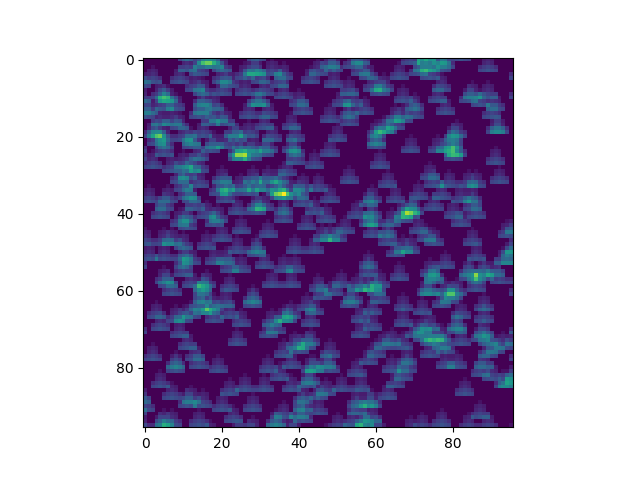

In [64]:
idimg = compute_convolution(shaped_matrix,identity_kernel)

plt.figure()

plt.imshow(idimg)

In [65]:
def plot_convolution(img, kernel, activation=False):
    ''' The following printing function ease the visualization'''
    
    img = np.squeeze(img)
    output_img = compute_convolution(img, kernel)
    if activation:
        output_img = np.maximum(output_img, 0)
    
    plt.figure(figsize=(8, 3))
    
    ax1 = plt.subplot2grid((3,3),(0,0), rowspan=3)
    ax1.imshow(img, cmap='gray')
    ax1.title.set_text('Input image')
    
    ax2 = plt.subplot2grid((3,3),(1, 1))
    ax2.imshow(kernel, cmap='gray')
    ax2.title.set_text('Kernel')    
    
    ax3 = plt.subplot2grid((3,3),(0, 2), rowspan=3)
    ax3.imshow(output_img, cmap='gray')
    ax3.title.set_text('Output image')    

    
    for ax in [ax1, ax2, ax3]:
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        
    plt.show()

In [66]:
kernel_1 = [
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
]

identity_kernel2 = [
    [100,100,100, 100, 100],
    [50,70, 80, 70, 50],
    [0, 40, 50, 40, 0],
    [0, 30, 40, 30, 0],
    [0,  0, 20,  0, 0]
]

identity_kernel3 = [
    [0, 0, 100, 0, 0],
    [0,70, 80, 70, 0],
    [30, 40, 50, 40, 30],
    [20, 30, 40, 30, 20],
    [10,  20, 20,  20, 10]
]

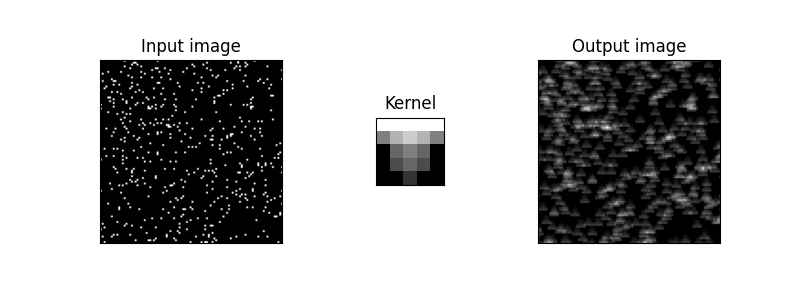

In [67]:
plot_convolution(shaped_matrix, identity_kernel2)

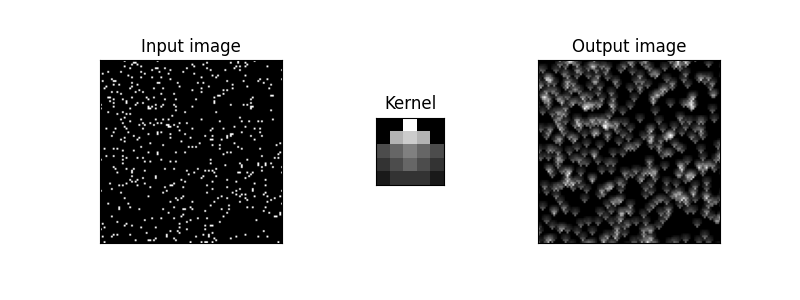

In [61]:
plot_convolution(shaped_matrix, identity_kernel3, activation=True)

In [69]:
random_matrix_h = [0]*5000 + [1]*2000 + [2]*1000 + [3]*1000 + [4]*500 + [5]*300 + [10]*200

random.shuffle(random_matrix_h)
np_matrix = np.array(random_matrix_h)

shaped_matrix_h = np_matrix.reshape(100,100)

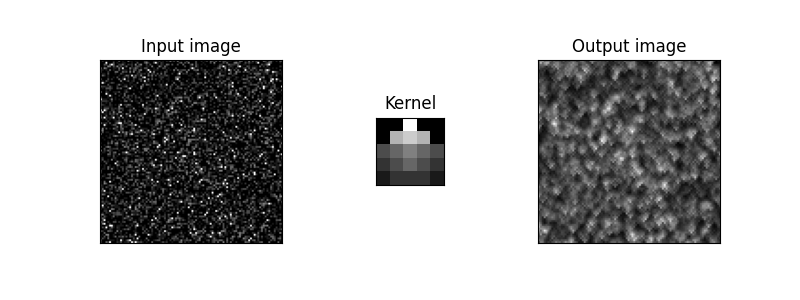

In [70]:
plot_convolution(shaped_matrix_h, identity_kernel3, activation=True)